### Itération 1

#### Extraire l’ensemble des lignes du csv, stocker les infos dans un dataframe, nettoyer et regarder les données. 

##### Extraction

In [2]:
import pandas as pd
df = pd.read_csv('data/trees.csv', )

In [12]:
df2 = df[["ANNEEDEPLANTATION", "GENRE_BOTA"]]
df2.groupby("ANNEEDEPLANTATION").nunique()["GENRE_BOTA"].values

array([ 6,  5, 48,  1,  1, 37, 21, 18, 17, 27, 49, 13, 24,  9, 10, 54, 42,
       34, 29, 25, 51, 36, 37, 36, 32, 34, 22, 31, 16, 28, 25, 21, 24, 26,
       26, 32, 30, 17, 19, 40, 30, 29, 22, 31, 35, 29, 39, 21, 27, 48, 36,
       49, 37, 35, 61, 58, 39, 30])

##### Format des données + infos générales

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31243 non-null  int64  
 1   CODE                   31243 non-null  object 
 2   NOM                    31243 non-null  object 
 3   GENRE                  31243 non-null  object 
 4   GENRE_DESC             31243 non-null  object 
 5   CATEGORIE              31243 non-null  object 
 6   CATEGORIE_DESC         31243 non-null  object 
 7   SOUS_CATEGORIE         31243 non-null  object 
 8   SOUS_CATEGORIE_DESC    31243 non-null  object 
 9   CODE_PARENT            31243 non-null  object 
 10  CODE_PARENT_DESC       31243 non-null  object 
 11  ADR_SECTEUR            31243 non-null  int64  
 12  BIEN_REFERENCE         31243 non-null  object 
 13  GENRE_BOTA             30728 non-null  object 
 14  ESPECE                 29053 non-null  object 
 15  VA

#####  Nettoyage 

In [3]:
# On enlève toutes les colonnes qui ne possèdent aucune information 
cols_to_drop = [col for col in df.columns if df[col].isnull().all()]
df_clean = df.drop(columns=cols_to_drop)

In [4]:
# On regarde le nombre de valeurs différentes par colonne
df_clean.nunique()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1447
CODE_PARENT_DESC          1447
ADR_SECTEUR                  6
BIEN_REFERENCE           31243
GENRE_BOTA                 112
ESPECE                     255
VARIETE                    146
STADEDEDEVELOPPEMENT         3
ANNEEDEPLANTATION           58
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
COLLECTIVITE                 2
GeoJSON                  31242
dtype: int64

In [5]:
# On enlève les colonnes qui ne possèdent qu'une seule valeur différente
cols_to_drop = [col for col in df_clean.columns if df_clean.nunique()[col] == 1]
df_clean.drop(columns=cols_to_drop, inplace=True)

In [6]:
# On regarde un peu la tête des données
df_clean.sample(5)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,...,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
1643,2488,ESP9435,ESP9435,ESP174,Arbre d'espaces ouverts,ESP897,Pc Ch Elysés Maison l'enfance,3,AR9435,Acer,...,NaN,Arbre adulte,1970.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7066464927995..."
8306,31641,ESP32448,ESP32448,ESP174,Arbre d'espaces ouverts,ESP1388,Butte n 04 zénith,6,AR32448,Quercus,...,Columnaris,Arbre jeune,1975.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7378038788290..."
8249,36821,ESP37289,ESP37289,ESP151,Arbre de voirie,ESP1330,Crs Libé Verlaine Bauvert,3,AR37289,Platanus,...,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7109893678937..."
11931,27158,ESP13812,ESP13812,ESP151,Arbre de voirie,ESP306,Ave Ronsard,3,AR13812,Platanus,...,NaN,Arbre adulte,1965.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7103728288017..."
17118,25819,ESP8615,ESP8615,ESP151,Arbre de voirie,ESP469,Av Constantine impair,6,AR8615,Zelkova,...,NaN,Arbre adulte,2013.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7353318703258..."


In [7]:
# Rendre visible toutes les colonnes du dataframe
pd.set_option('display.max_columns', len(df_clean.columns))
df_clean.sample(5)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
2817,6975,ESP30652,ESP30652,ESP174,Arbre d'espaces ouverts,ESP912,Sq H Mauchant grande pelouse,5,AR30652,Albizia,jullibrissin,NaN,Arbre adulte,1988.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7378807092607..."
19373,1249,ESP2124,ESP2124,ESP151,Arbre de voirie,ESP841,Bd Diable Bleu Mistral Pasteur,5,AR2124,Platanus,acerifolia,NaN,Arbre adulte,1950.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7326117544575..."
3677,31628,ESP32447,ESP32447,ESP187,Bois semi naturel,ESP31658,Technisud zone boisée,3,AR32447,Carpinus,betulus,NaN,Arbre adulte,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7077880992939..."
20825,23230,ESP6900,ESP6900,ESP174,Arbre d'espaces ouverts,ESP593,Parc 2 R Herminier ch de Ronde,2,AR6900,Carpinus,betulus,NaN,Arbre adulte,1960.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7365943390980..."
13918,33509,ESP33774,ESP33774,ESP174,Arbre d'espaces ouverts,ESP53,Prc Echangeurs talus berges,5,AR33774,Carpinus,orientalis,NaN,Arbre jeune,2015.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7475076055949..."


In [8]:
# On ne récupère finalement que les colonnes qui nous intéressent 
cols_of_interest = ["GENRE_BOTA", "ESPECE", "VARIETE", 
                    "STADEDEDEVELOPPEMENT", "ANNEEDEPLANTATION", 
                    "RAISONDEPLANTATION", "GeoJSON" ]

df_clean = df_clean[cols_of_interest]
df_clean.sample(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
22795,Platanus,acerifolia,NaN,Arbre adulte,1975.0,NaN,"{""type"":""Point"",""coordinates"":[5.7346884751520..."
1886,Platanus,acerifolia,NaN,Arbre adulte,1985.0,NaN,"{""type"":""Point"",""coordinates"":[5.7289244082577..."
27995,Quercus,cerris,NaN,Arbre jeune,2015.0,Nouveau,"{""type"":""Point"",""coordinates"":[5.7172522917490..."
2076,Prunus,avium,Plena,Arbre jeune,2013.0,NaN,"{""type"":""Point"",""coordinates"":[5.7124433570244..."
11072,Celtis,australis,NaN,Arbre adulte,2005.0,NaN,"{""type"":""Point"",""coordinates"":[5.7212088605166..."


In [9]:
# On a gagné pas mal d'espace en mémoire déjà. 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENRE_BOTA            30728 non-null  object 
 1   ESPECE                29053 non-null  object 
 2   VARIETE               4039 non-null   object 
 3   STADEDEDEVELOPPEMENT  29228 non-null  object 
 4   ANNEEDEPLANTATION     30801 non-null  float64
 5   RAISONDEPLANTATION    1050 non-null   object 
 6   GeoJSON               31243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


#### Affichage des données

##### Afficher les 5 premières lignes de ce csv.  

In [10]:
df_clean.head(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
0,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


##### Afficher les 5 dernières lignes de ce csv.  

In [11]:
df_clean.tail(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
31238,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117169490564..."
31239,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7115904446110..."
31240,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7114873970721..."
31241,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117859768817..."
31242,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7113357012675..."


##### Afficher 5  lignes au hasard de ce csv.  

In [12]:
df_clean.sample(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
16586,Pinus,nigra,NaN,Arbre adulte,1993.0,NaN,"{""type"":""Point"",""coordinates"":[5.7274467518061..."
1699,Acer,NaN,NaN,Arbre adulte,1985.0,NaN,"{""type"":""Point"",""coordinates"":[5.7038594831911..."
5572,Acer,NaN,NaN,Arbre jeune,1975.0,NaN,"{""type"":""Point"",""coordinates"":[5.7352533951814..."
10113,Quercus,palustris,Columnaris,Arbre jeune,1993.0,NaN,"{""type"":""Point"",""coordinates"":[5.7443213514786..."
23639,Pinus,nigra,Austriaca,Arbre adulte,1970.0,NaN,"{""type"":""Point"",""coordinates"":[5.7064258603262..."


##### Afficher une / des colonne(s) du dataframe 

In [13]:
# En utilsant la notation " [ ] "  ---> le résultat de sortie est une série 
df_clean["GENRE_BOTA"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

In [14]:
# En utilsant la notation " . " ---> le résultat de sortie est une série 
df_clean.GENRE_BOTA

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

In [15]:
# En utilsant la notation " [[ ]] "  ---> le résultat de sortie est un dataframe !
df_clean[["GENRE_BOTA"]]

,GENRE_BOTA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
31238,Fraxinus
31239,Fraxinus
31240,Fraxinus
31241,Fraxinus


In [16]:
# En passant une liste de colonnes
df_clean[["GENRE_BOTA", "ESPECE", "VARIETE"]]

,GENRE_BOTA,ESPECE,VARIETE
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
31238,Fraxinus,oxycarpa,Flame
31239,Fraxinus,oxycarpa,Flame
31240,Fraxinus,oxycarpa,Flame
31241,Fraxinus,oxycarpa,Flame


#### Combien d’arbres sont recensés dans ce jeu de données ?


In [17]:
# En utisant len
len(df_clean)

# En utilisant les infos... (déjà vu précédemment)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENRE_BOTA            30728 non-null  object 
 1   ESPECE                29053 non-null  object 
 2   VARIETE               4039 non-null   object 
 3   STADEDEDEVELOPPEMENT  29228 non-null  object 
 4   ANNEEDEPLANTATION     30801 non-null  float64
 5   RAISONDEPLANTATION    1050 non-null   object 
 6   GeoJSON               31243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


#### Pour combien d’arbres manque-t-il l’information concernant la date de plantation ? 

In [18]:
# isna() et isnull() sont identiques. Vous pouvez choisir une option ou l'autre. 
df_clean.ANNEEDEPLANTATION.isna().sum()
df_clean.ANNEEDEPLANTATION.isnull().sum()

442

In [19]:
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
NaN        442
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

In [20]:
 df_clean.isnull().sample(10)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
12659,False,False,False,False,False,True,False
14659,False,False,True,False,False,True,False
995,False,False,True,False,False,True,False
20409,False,True,True,False,False,True,False
22516,False,False,True,False,False,True,False
4986,False,False,True,False,False,True,False
399,False,False,True,False,False,True,False
7220,False,False,True,False,False,True,False
13268,False,False,True,False,False,True,False
11542,False,True,True,False,False,True,False


#### Combien d’arbres ont été plantés l’année de votre naissance ? 


In [21]:
# On peut filtrer les données 
df_clean[df_clean.ANNEEDEPLANTATION == 1987]

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
1192,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7206351305938..."
1193,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7207565851719..."
1194,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7206926924567..."
1195,Magnolia,grandiflora,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7176343333827..."
1196,Magnolia,grandiflora,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7178546100001..."
...,...,...,...,...,...,...,...
30845,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7184042964249..."
30846,Betula,verrucosa,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7190032099285..."
30847,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7191985370740..."
30848,Pinus,sylvestris,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7202054221388..."


In [22]:
# Et ainsi demander leur taille
len(df_clean[df_clean.ANNEEDEPLANTATION == 1987])

771

In [23]:
# On peut récupérer le nombre d'entrées par année
# cf question "Combien d’arbres ont été plantés année par année (ex : 1987 : 771, 1988 : 266, etc…) ?"
df_clean.ANNEEDEPLANTATION.value_counts()

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
1977.0     616
2006.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

In [24]:
# Idem mais en faisant apparaître les NaN également
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
NaN        442
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

In [25]:
# On peut se servir de ça pour récupérer les données voulues
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)[1987]

771

#### Quelle est la plus ancienne année de plantation recensée dans ce dataset ? La plus récente ?    

In [26]:
# La plus ancienne 
df_clean.ANNEEDEPLANTATION.min()

1950.0

In [27]:
# La plus récente 
df_clean.ANNEEDEPLANTATION.max()

2017.0

#### Combien d’arbres ont été plantés en moyenne chaque année ?   


In [28]:
df_clean.ANNEEDEPLANTATION.value_counts().mean()

531.051724137931

#### Pour combien d'arbres manque-t-il l’information concernant le genre botanique ?

In [29]:
df_clean.GENRE_BOTA.isna().sum()

515

#### Histogramme représentant le nombre d’arbres plantés par année.

Text(0, 0.5, "Nombre d'arbres plantés")

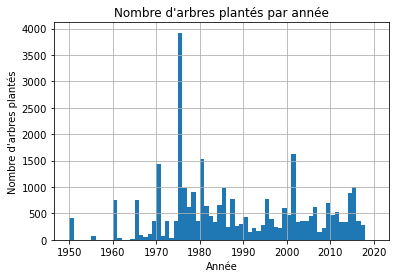

In [30]:
ax = df_clean.hist(column="ANNEEDEPLANTATION", bins=list(range(1950,2021)))
ax[0][0].set_title("Nombre d'arbres plantés par année")
ax[0][0].set_xlabel("Année")
ax[0][0].set_ylabel("Nombre d'arbres plantés")

### Itération 2 

#### Pour commencer, identifiez tous les genres botaniques représentés à Grenoble.  Essayez plusieurs manières de résoudre ce problème.  

In [31]:
df_clean.GENRE_BOTA.dropna().unique()

array(['Platanus', 'Ginkgo', 'Salix', 'Liriodendron', 'Catalpa', 'Pyrus',
       'Robinia', 'Acer', 'Zelkova', 'Parrotia', 'Fraxinus', 'Fagus',
       'Magnolia', 'Taxus', 'Alnus', 'Picea', 'Cupressus',
       'Sequoiadendron', 'Pinus', 'Betula', 'Tilia', 'Cedrus', 'Populus',
       'Celtis', 'Thuja', 'Sorbus', 'Sophora', 'Liquidambar', 'Prunus',
       'Calocedrus', 'Paulownia', 'Gymnocladus', 'Ulmus', 'Corylus',
       'Morus', 'Clerodendron', 'Gleditsia', 'Libocedrus', 'Quercus',
       'Lagerstroemia', 'Taxodium', 'Amélanchier', 'Cercidiphyllum',
       'Ilex', 'Malus', 'Cedrela', 'Photinia', 'Tetradium',
       'Koelreuteria', 'Halesia', 'Crataegus', 'Aesculus', 'Ptelea',
       'Chimonanthus', 'Carpinus', 'Metasequoia', 'Cercis', 'Cornus',
       'Juglans', 'Pteroceltis', 'Broussonetia', 'Phellodendron',
       'Cupressocyparis', 'Cydonia', 'Ficus', 'Eleagnus', 'Lonicera',
       'Albizia', 'Pterocarya', 'Davidia', 'Buxus', 'Cladastris',
       'Chionanthus', 'Syringa', 'Abies', 

#### Identifiez maintenant toutes les espèces différentes présentes à Grenoble. N’oubliez pas que les espèces sont une sous catégorie de genre botanique ! (l’espèce est ‘Platanus Acerifolia’ et pas uniquement ‘Acerifolia’) 

In [32]:
# En utilisant le set 
especes = set(df_clean.GENRE_BOTA + " " + df_clean.ESPECE)
especes

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [33]:
# On retire le nan en utilisant np
from numpy import nan
especes.discard(nan)
especes

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [34]:
# En utilisant les opérations str vectorisées
set(df_clean.GENRE_BOTA.str.cat(df_clean.ESPECE, sep =" "))

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

#### Compter le nombre de représentants de chaque genre botanique

In [35]:
df_clean.GENRE_BOTA.value_counts()

Acer          5276
Platanus      4663
Pinus         2118
Tilia         1770
Fraxinus      1506
              ... 
Rhamnus          1
Sequoia          1
Castanea         1
Sorbopyrus       1
Eucalyptus       1
Name: GENRE_BOTA, Length: 112, dtype: int64

##### Quel est le genre botanique le plus représenté ?

In [36]:
df_clean.GENRE_BOTA.value_counts().idxmax()

'Acer'

##### Listez tous les représentants uniques de leurs genre botanique  

In [37]:
# Option 1 : comprehension
genres_bota = df_clean.GENRE_BOTA.dropna().unique()
solitaires = [genre for genre in genres_bota if df_clean.GENRE_BOTA.value_counts()[genre] == 1]
solitaires

['Sterculia',
 'Rhamnus',
 'Castanea',
 'Eucalyptus',
 'Staphylea',
 'Sequoia',
 'Nyssa',
 'Sciadopitys',
 'Sorbopyrus',
 'Poncinos']

In [38]:
# Option 2 : avec pandas directement
value_counts = df_clean.GENRE_BOTA.value_counts()
value_counts[value_counts == 1].index

Index(['Nyssa', 'Sterculia', 'Sciadopitys', 'Staphylea', 'Poncinos', 'Rhamnus',
       'Sequoia', 'Castanea', 'Sorbopyrus', 'Eucalyptus'],
      dtype='object')

#### (plus dur) Comment la pratique de plantation a-t-elle évolué au cours du temps ? Diversifie-t-on plus maintenant qu’avant ? Vos analyses sont-elles en accord avec le communiqué de presse ? 

In [39]:
# 3 genres dominants
liste_genre_dominants = (list(df_clean.groupby('GENRE_BOTA')
                                      .size()
                                      .sort_values(ascending=False)[:3]
                                      .index))
liste_genre_dominants

['Acer', 'Platanus', 'Pinus']

In [40]:
# On calcule le nbre d'Acer, Platanus et Pinus plantés chaque année
dominants_per_year = (df_clean.loc[df_clean.GENRE_BOTA
                                           .isin(
                                               liste_genre_dominants
                                           )]
                              .groupby(['ANNEEDEPLANTATION', "GENRE_BOTA"])
                              .size())
dominants_per_year

ANNEEDEPLANTATION  GENRE_BOTA
1950.0             Platanus      381
1955.0             Platanus       45
1960.0             Acer           69
                   Pinus          64
                   Platanus      155
                                ... 
2016.0             Acer           41
                   Platanus       37
2017.0             Acer           50
                   Pinus           6
                   Platanus       40
Length: 155, dtype: int64

In [41]:
# Calcul du nbre d'arbres plantés chaque année
nbre_arbres_plantes_per_year = df_clean.groupby("ANNEEDEPLANTATION").size()
nbre_arbres_plantes_per_year

ANNEEDEPLANTATION
1950.0     422
1955.0      66
1960.0     745
1961.0      27
1964.0       7
1965.0     760
1966.0      95
1967.0      57
1968.0     116
1969.0     350
1970.0    1444
1971.0      75
1972.0     364
1973.0      34
1974.0     350
1975.0    3922
1976.0     972
1977.0     616
1978.0     912
1979.0     361
1980.0    1528
1981.0     644
1982.0     448
1983.0     333
1984.0     666
1985.0     990
1986.0     238
1987.0     771
1988.0     266
1989.0     307
1990.0     433
1991.0     146
1992.0     226
1993.0     161
1994.0     288
1995.0     781
1996.0     385
1997.0     238
1998.0     220
1999.0     603
2000.0     461
2001.0    1626
2002.0     341
2003.0     352
2004.0     352
2005.0     450
2006.0     616
2007.0     155
2008.0     219
2009.0     696
2010.0     467
2011.0     530
2012.0     338
2013.0     335
2014.0     881
2015.0     996
2016.0     347
2017.0     272
dtype: int64

In [42]:
# On calcule la proportion de chacun de ces 3 genres par rapport au total
props = (dominants_per_year / nbre_arbres_plantes_per_year * 100).astype(int)
props

ANNEEDEPLANTATION  GENRE_BOTA
1950.0             Platanus      90
1955.0             Platanus      68
1960.0             Acer           9
                   Pinus          8
                   Platanus      20
                                 ..
2016.0             Acer          11
                   Platanus      10
2017.0             Acer          18
                   Pinus          2
                   Platanus      14
Length: 155, dtype: int64

In [43]:
# On affiche d'une manière dataframe
props.unstack().fillna('')

GENRE_BOTA,Acer,Pinus,Platanus
ANNEEDEPLANTATION,,,
1950.0,,,90
1955.0,,,68
1960.0,9,8,20
1964.0,,,100
1965.0,8,3,41
1966.0,9,3,
1967.0,35,5,
1968.0,37,6,25
1969.0,8,32,17


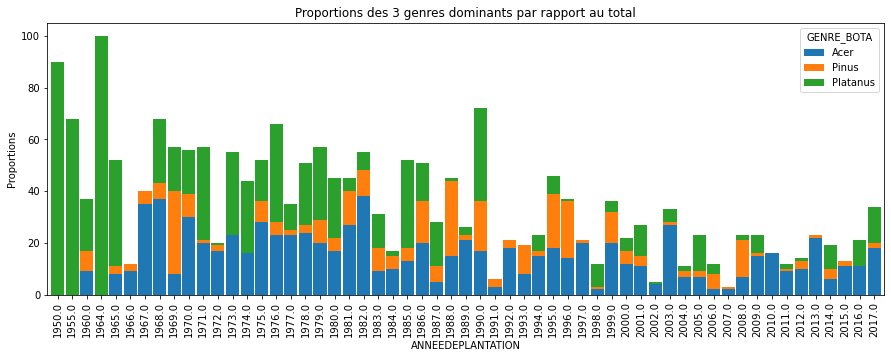

In [44]:
# On plot avec pandas avec l'option "bar" et "stacked"
ax = props.unstack().plot(kind = "bar",
                          figsize=(15, 5), 
                          stacked=True, 
                          width=0.9)
ax.set_ylabel("Proportions")
_ = ax.set_title("Proportions des 3 genres dominants par rapport au total")

### Plusieurs sources évoquent une espérance de vie moyenne des arbres en ville de 30 à 80 ans. Les données de terrain disponibles pour Grenoble corroborent-elles ces sources ?   


In [45]:
df_clean["age"] = 2017 - df_clean["ANNEEDEPLANTATION"]
df_ages = df_clean.loc[:, ["age", "STADEDEDEVELOPPEMENT"]].dropna()
df_ages.sample(5)

,age,STADEDEDEVELOPPEMENT
1199,30.0,Arbre adulte
26612,57.0,Arbre vieillissant
28081,12.0,Arbre adulte
1370,18.0,Arbre adulte
2211,47.0,Arbre adulte


In [46]:
df_ages.groupby('STADEDEDEVELOPPEMENT').describe()

age                                               \
                        count       mean        std  min   25%   50%   75%   
STADEDEDEVELOPPEMENT                                                         
Arbre adulte          23875.0  34.249592  12.979591  3.0  23.0  37.0  42.0   
Arbre jeune            5170.0   8.926112  10.334376  1.0   3.0   6.0   9.0   
Arbre vieillissant      183.0  47.437158  14.940730  7.0  37.0  47.0  67.0   

                            
                       max  
STADEDEDEVELOPPEMENT        
Arbre adulte          67.0  
Arbre jeune           67.0  
Arbre vieillissant    67.0

In [50]:
indesirable = {"Acer":"indesirable", "Platanus":"indesirable"}
df_clean["desirabilite"] = df_clean.GENRE_BOTA.map(lambda x: indesirable[x] if x in indesirable else "desirable")

In [53]:
df_clean.sample(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON,age,desirabilite
19165,Pinus,sylvestris,Austriaca,Arbre adulte,1986.0,NaN,"{""type"":""Point"",""coordinates"":[5.7347256020239...",31.0,desirable
28313,Cedrus,atlantica,NaN,Arbre adulte,1975.0,NaN,"{""type"":""Point"",""coordinates"":[5.7108653835343...",42.0,desirable
31234,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7115308891266...",16.0,desirable
12466,Platanus,acerifolia,NaN,Arbre adulte,1975.0,NaN,"{""type"":""Point"",""coordinates"":[5.7166986461981...",42.0,indesirable
12099,Pyrus,calleryana,Chanticleer,Arbre adulte,1994.0,NaN,"{""type"":""Point"",""coordinates"":[5.7347537663041...",23.0,desirable
